# Loan Approval Case Study in Python

# Business Scenario
This case study addresses a very common problem in the Banking industry. 

"To approve or reject this loan application?". 

The bank executives rely on extensive background checks to take the decision. Since there are many applications which needs to be processed everyday, it will be helpful if there was a predictive model in place which can assist the executives to do their job by giving them a heads up about approval or rejection of a new loan application.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
loanApprovalData = pd.read_csv(filepath_or_buffer='LoanApprovalData.csv', sep=',', encoding='latin-1')

print('Shape BEFORE deleting duplicate values: ',  loanApprovalData.shape)

# Removing the duplicates
print('Shape AFTER deleting duplicate values: ', loanApprovalData.drop_duplicates().shape)

# Printing the sample values
loanApprovalData.head()

Shape BEFORE deleting duplicate values:  (614, 13)
Shape AFTER deleting duplicate values:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Defining the Problem Statement
<b> Create a predictive model which can tell whether to approve a loan application or not?</b>
- Target Variable: Loan_Status
- Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.

# Type of Machine Learning
Based on the problem statement, the target variable is Loan_Status which is a Categorical Variable

We need to create a Supervised ML Classification model

# Distribution of Target Variable

<Axes: xlabel='Loan_Status'>

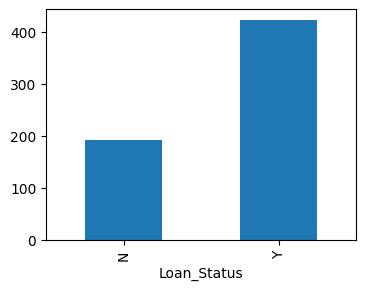

In [3]:
loanApprovalData.groupby('Loan_Status').size().plot(kind='bar', figsize=(4,3))

The data distribution is satisfactory to proceed further

# Basic Data Exploration

In [4]:
loanApprovalData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loanApprovalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loanApprovalData.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
loanApprovalData.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loanApprovalData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Basic Data Exploration Results
- Loan_ID: Qualitative. Rejected. This column does not affect the loan approval or rejection.
- Gender: Categorical. Selected.
- Married: Categorical. Selected.
- Dependents: Categorical. Selected.
- Education: Categorical. Selected.
- Self_Employed: Categorical. Selected.
- ApplicantIncome: Quantitative. Selected.
- CoapplicantIncome: Quantitative. Selected.
- LoanAmount: Quantitative. Selected.
- Loan_Amount_Term: Categorical. Selected.
- Credit_History: Categorical. Selected.
- Property_Area: Categorical. Selected.
- Loan_Status: Categorical. Selected. This is the Target Variable!

# Removing unnecessary variables

In [9]:
loanApprovalData = loanApprovalData.drop(columns='Loan_ID', axis=1)
loanApprovalData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Visual Exploratory Data Analysis (Uni-Variate Analysis)

### Categorical Variables

In [10]:
catgVar = ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [11]:
# We can define a function to plot the bar charts at one go

def plotBarCharts(inpData, catgVar):
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(catgVar), figsize=(40,6))
    fig.suptitle('Bar Plots of: ' + str(catgVar))
    
    for barPlot, plotArea in zip(catgVar, range(len(catgVar))):
        inpData.groupby(barPlot).size().plot(kind='bar', ax=subplot[plotArea])

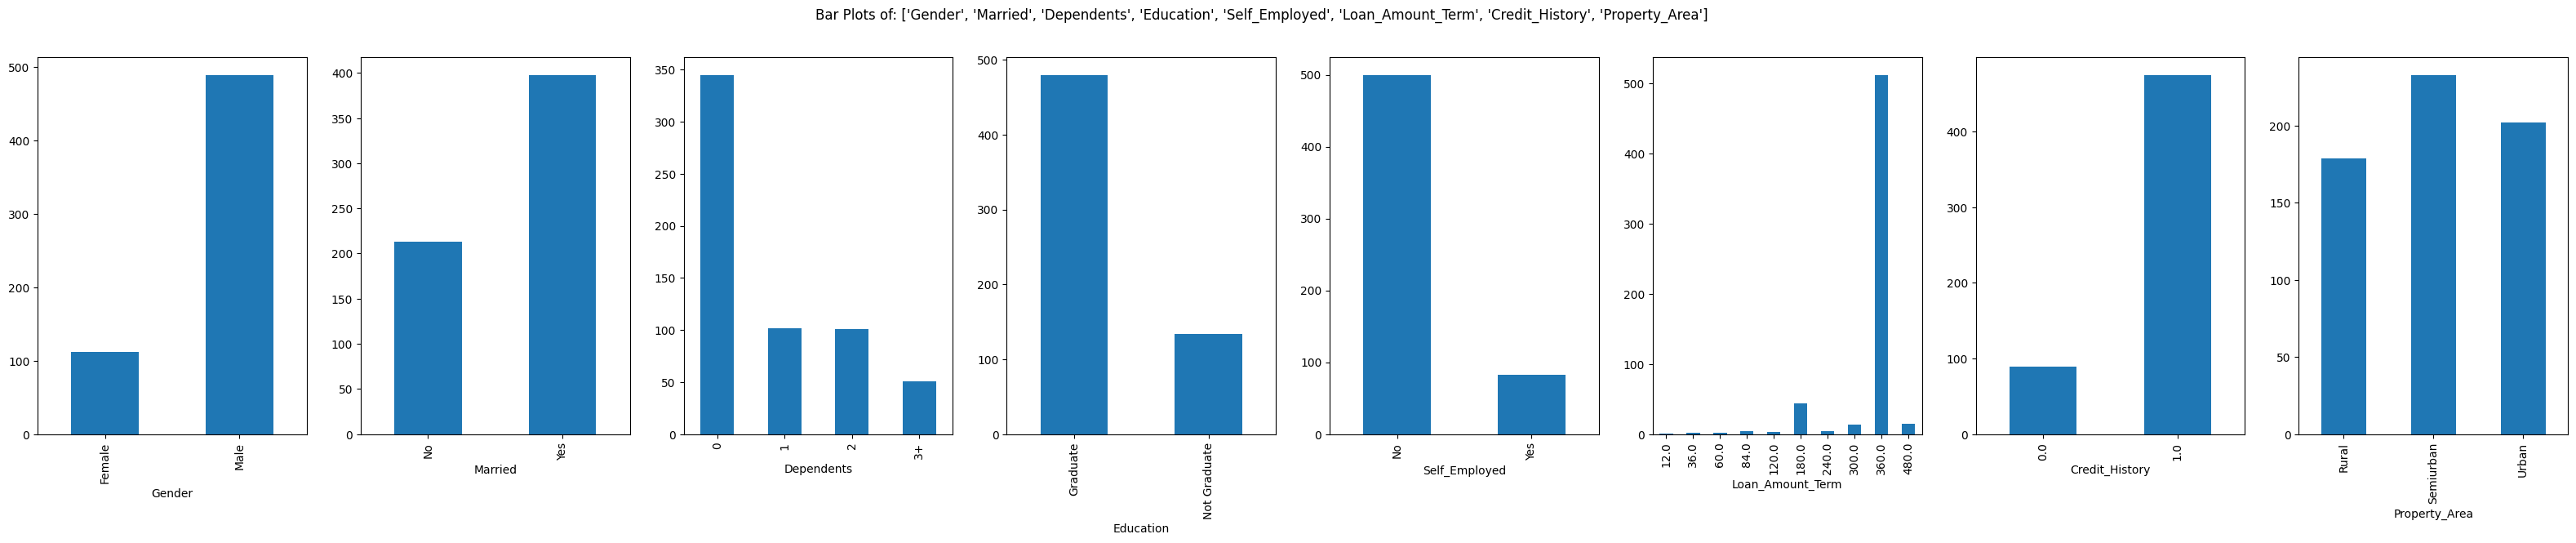

In [12]:
plotBarCharts(loanApprovalData, catgVar)

For now, we are selecting all the columns as they have satisfactory distribution however Loan_Amount_Term column needs to be verified in the correlation step because it has only one dominant bar 

### Continuous Variables

In [13]:
contVar = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

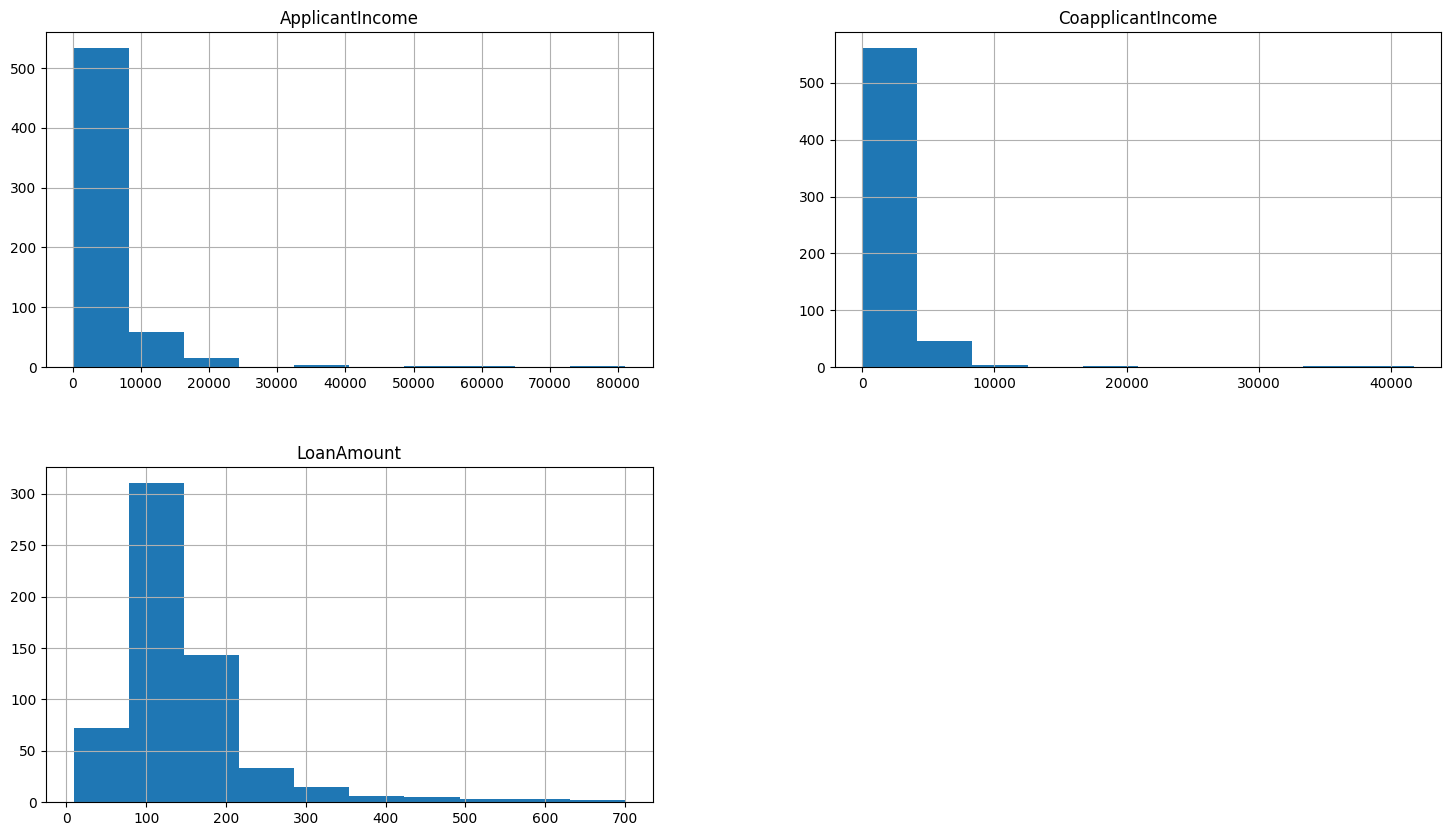

In [14]:
# Using Histogram to see the distribution of continuous variables

loanApprovalData.hist(contVar, figsize=(18,10))

- ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
- CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
- LoanAmount: Selected. Slightly skewed distribution, acceptable.

# Outlier Treatment
Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

### Outlier Treatment - Applicant Income

In [15]:
len(loanApprovalData['ApplicantIncome'][loanApprovalData['ApplicantIncome']>30000])

7

In [16]:
loanApprovalData['ApplicantIncome'][loanApprovalData['ApplicantIncome']<30000].sort_values(ascending=False)

126    23803
506    20833
284    20667
308    20233
130    20166
       ...  
188      674
500      645
600      416
468      210
216      150
Name: ApplicantIncome, Length: 607, dtype: int64

In [17]:
# Replacing the values 
loanApprovalData['ApplicantIncome'][loanApprovalData['ApplicantIncome']>30000] = 23803

### Outlier Treatment - CoapplicantIncome

In [18]:
len(loanApprovalData['CoapplicantIncome'][loanApprovalData['CoapplicantIncome']>15000])

4

In [19]:
loanApprovalData['CoapplicantIncome'][loanApprovalData['CoapplicantIncome']<15000].sort_values(ascending=False)

177    11300.0
9      10968.0
122     8980.0
444     8333.0
12      8106.0
        ...   
278        0.0
274        0.0
271        0.0
270        0.0
613        0.0
Name: CoapplicantIncome, Length: 610, dtype: float64

In [20]:
loanApprovalData['CoapplicantIncome'][loanApprovalData['CoapplicantIncome']>15000] = 11300

# Visualization after Outlier Treatment

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

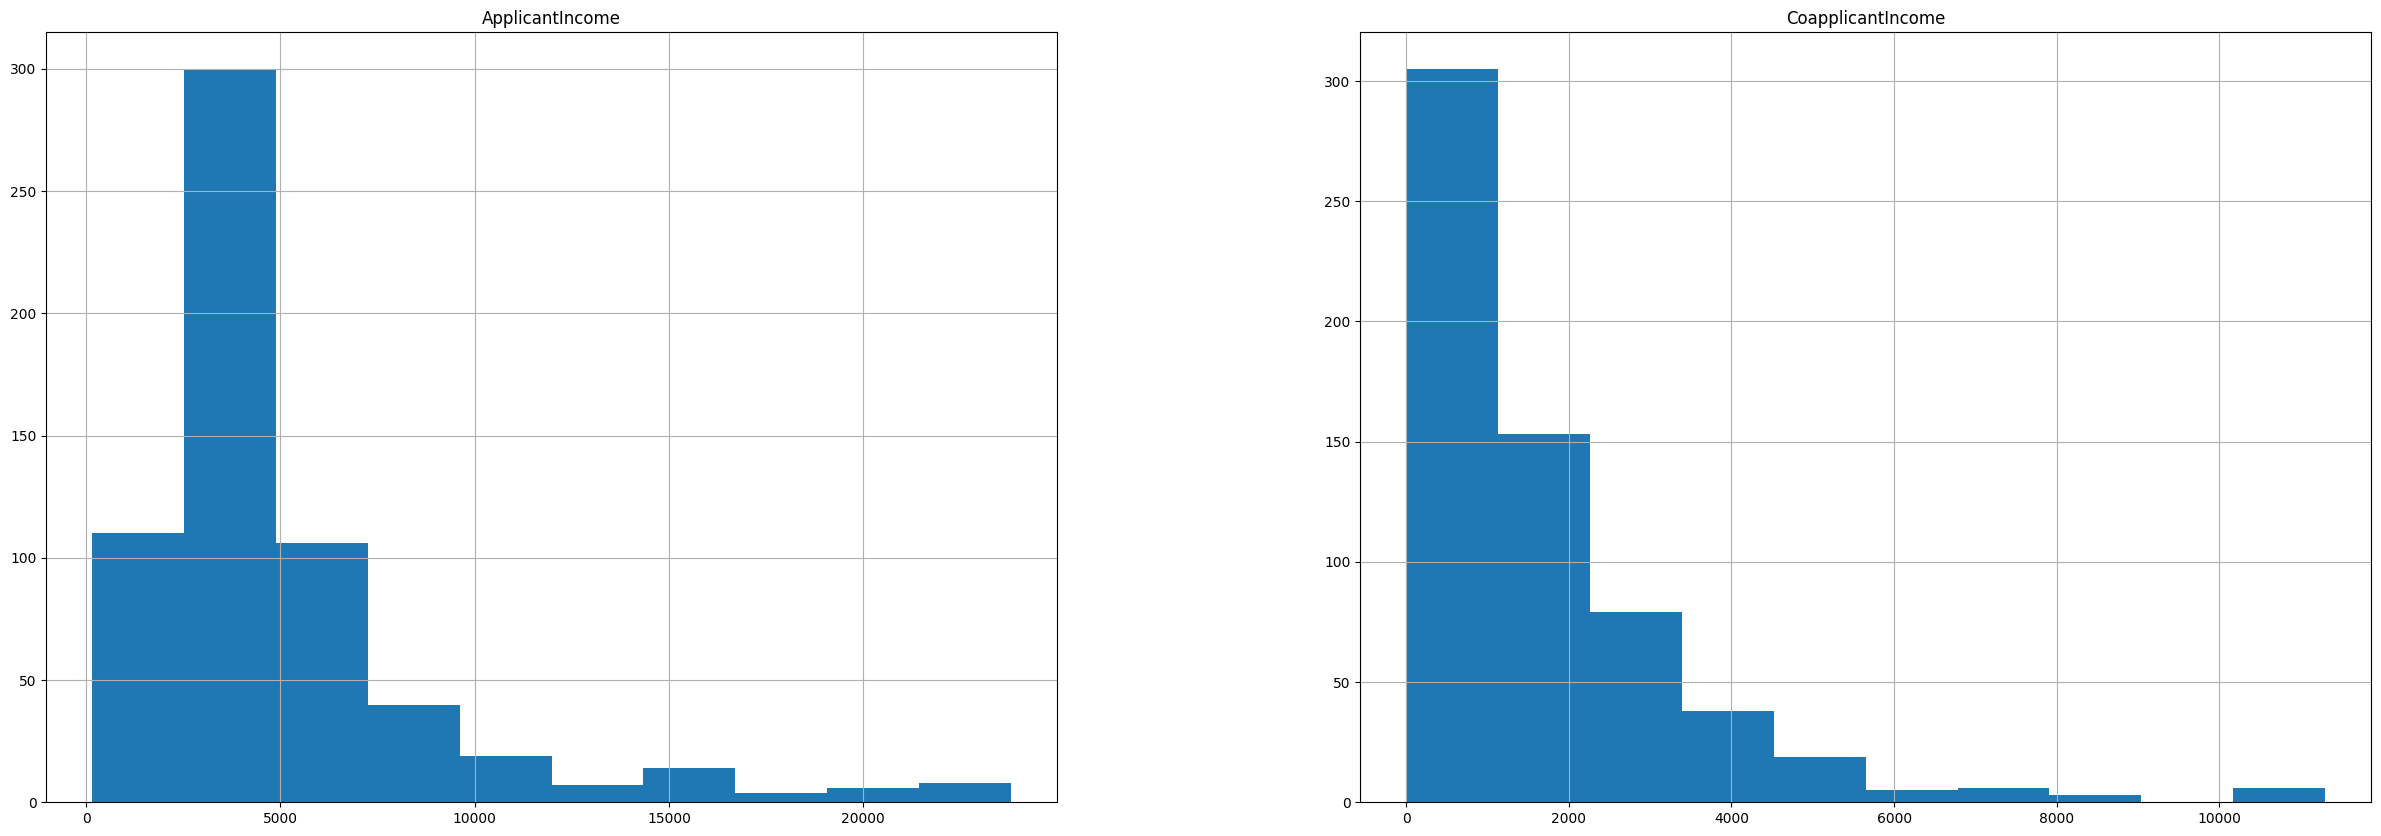

In [21]:
loanApprovalData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(30,10))

# Missing Values Treatment

In [22]:
loanApprovalData.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# Using Mode
loanApprovalData['Gender'].fillna(loanApprovalData['Gender'].mode()[0], inplace=True)
loanApprovalData['Married'].fillna(loanApprovalData['Married'].mode()[0], inplace=True)
loanApprovalData['Dependents'].fillna(loanApprovalData['Dependents'].mode()[0], inplace=True)
loanApprovalData['Self_Employed'].fillna(loanApprovalData['Self_Employed'].mode()[0], inplace=True)
loanApprovalData['Loan_Amount_Term'].fillna(loanApprovalData['Loan_Amount_Term'].mode()[0], inplace=True)
loanApprovalData['Credit_History'].fillna(loanApprovalData['Credit_History'].mode()[0], inplace=True)
# Using Median
loanApprovalData['LoanAmount'].fillna(loanApprovalData['LoanAmount'].median(), inplace=True)

In [24]:
loanApprovalData.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Feature Selection (Bi-Variate Analysis)
In this case, these two will be used:
- Categorical vs Continuous (ANOVA Test)
- Categorical vs Categorical (Chi-Square Test)

### Relationship Exploration : Categorical vs Continuous - Box Plot

In [25]:
# Defining a function to plot the charts at one go

targetVar = 'Loan_Status'

def boxPlot(inpData, colsToPlot):
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(25,10))
    
    for boxPlots, plotArea in zip(colsToPlot, range(len(colsToPlot))):
        inpData.boxplot(column=boxPlots, by=targetVar, ax=subplot[plotArea])

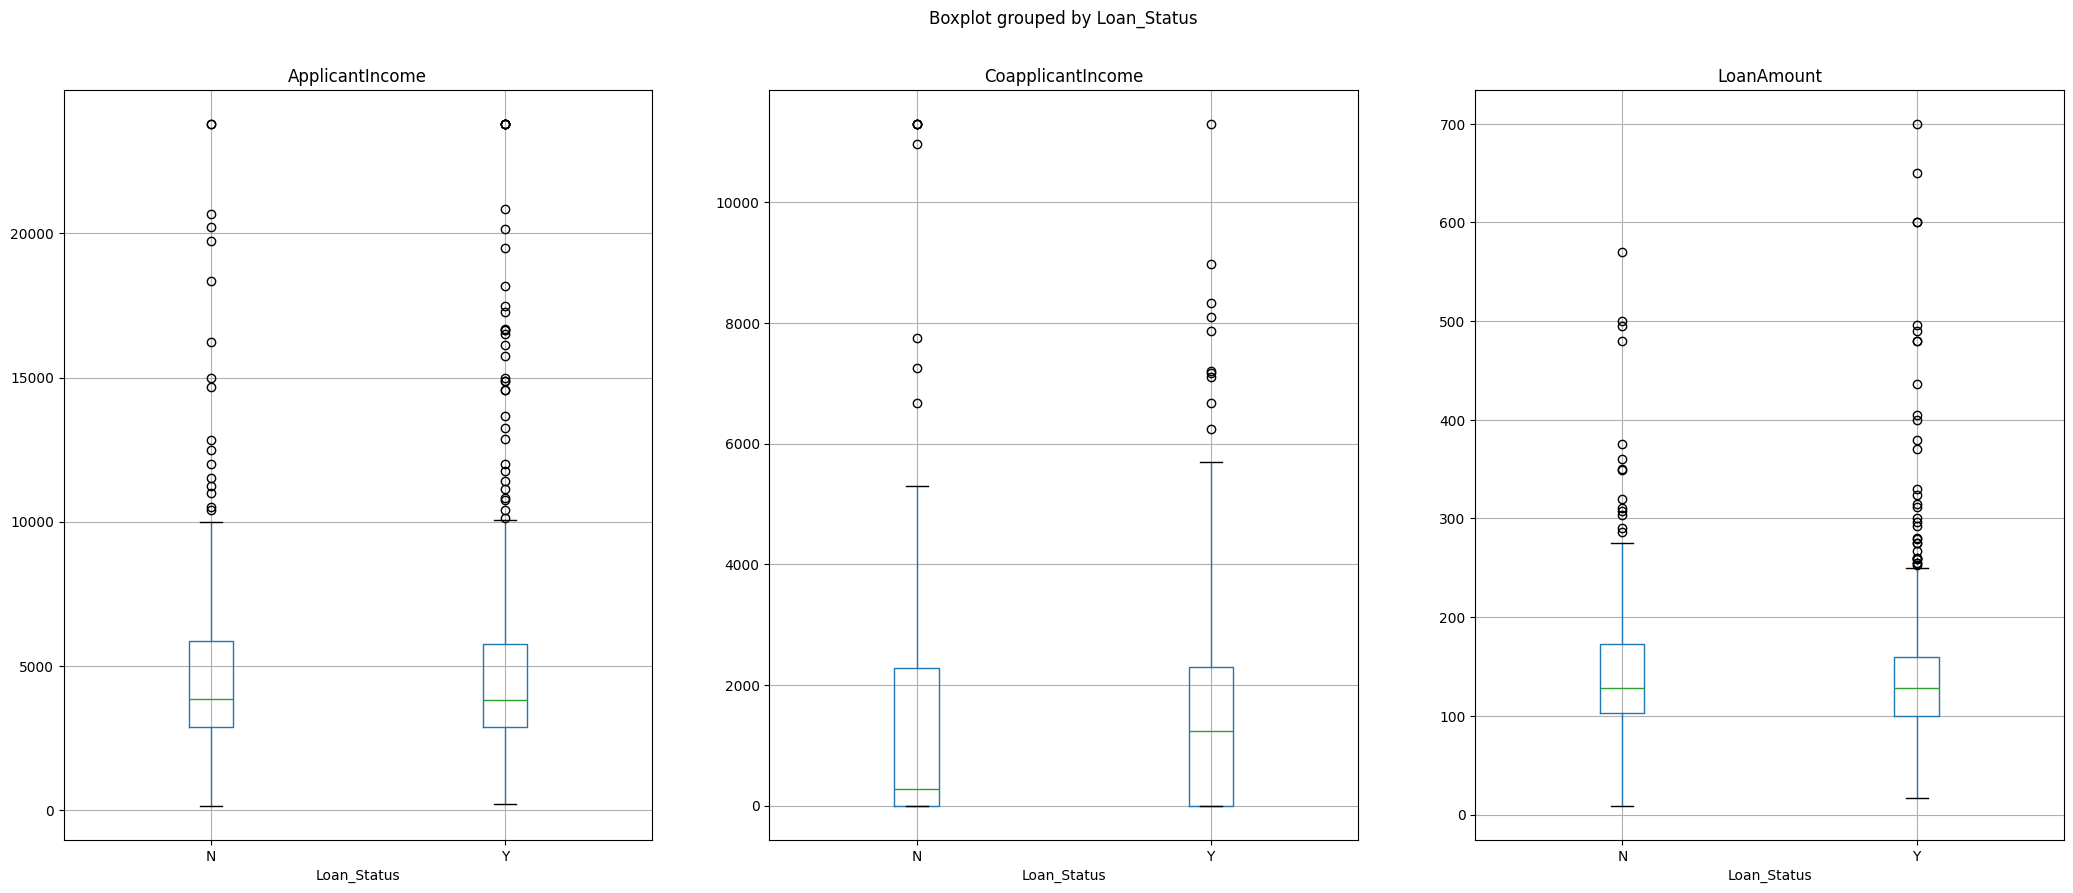

In [26]:
boxPlot(loanApprovalData, contVar)

The boxes are in the same line which indicates no correlation between the variables.

In the following step of ANOVA Test we can prove it

### Statistical Feature Selection

In [27]:
# We will define a function to get the ANOVA results of all the variables

def ANOVA(inpData, targetVar, predictors):
    
    from scipy.stats import f_oneway
    
    selectedVariables = []
    
    for i in predictors:
        groupedData = inpData.groupby(targetVar)[i].apply(list)
        anovaResult = f_oneway(*groupedData)
        
        if anovaResult[1] < 0.05:
            print(i, 'is CORRELATED with', targetVar, '| ANOVA Result: ', anovaResult[1])
            selectedVariables.append()
            
        else:
            print(i, 'is NOT CORRELATED with', targetVar, '| ANOVA Result: ', anovaResult[1])
            
    return selectedVariables

In [28]:
ANOVA(loanApprovalData, targetVar, contVar)

ApplicantIncome is NOT CORRELATED with Loan_Status | ANOVA Result:  0.9529534007092838
CoapplicantIncome is NOT CORRELATED with Loan_Status | ANOVA Result:  0.6651120750168427
LoanAmount is NOT CORRELATED with Loan_Status | ANOVA Result:  0.41132365467797827


[]

This proves that none of the continous variables are correlated with the target variable

### Relationship Exploration: Categorical vs Categorical - Grouped Bar Chart

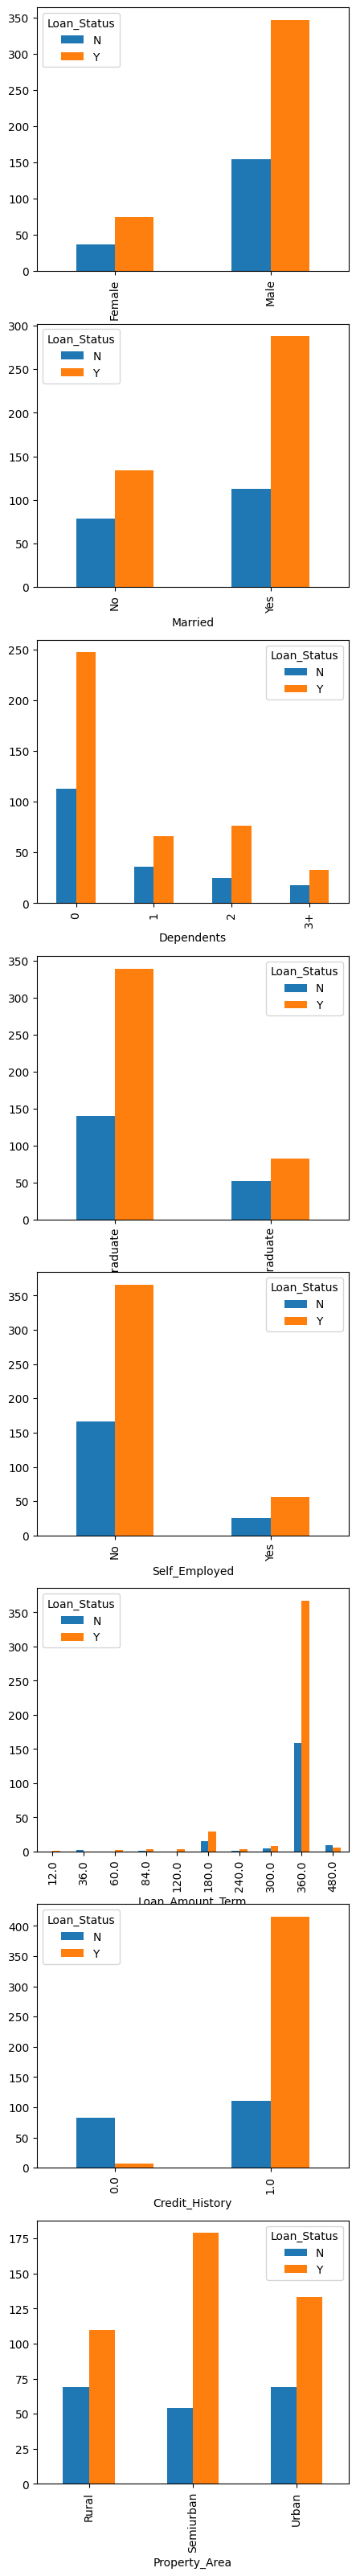

In [29]:
# Cross Tabulation between two Categorical Variables

catgVar = ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

fig, subplot = plt.subplots(nrows=len(catgVar), ncols=1, figsize=(5,40))

for crossT, plotArea in zip(catgVar, range(len(catgVar))):
    CrossTab = pd.crosstab(index=loanApprovalData[crossT], columns=loanApprovalData['Loan_Status'])
    CrossTab.plot.bar(ax=subplot[plotArea])

Let's confirm the analysis by performing chi-Square Test

### Statistical Feature Selection

In [30]:
# We will define a formula to get the Chi-Square results for all the variables

def chiSquare(inpData, targetVar, predictors):
    
    from scipy.stats import chi2_contingency
    
    selectedVar = []
    
    for i in predictors:
        crossTabulation = pd.crosstab(index=inpData[i], columns=inpData[targetVar])
        chi2Result = chi2_contingency(crossTabulation)
        
        if chi2Result[1] < 0.05:
            print(i, 'is CORRELATED with', targetVar, '| P-Value:', chi2Result[1])
            selectedVar.append(i)
            
        else:
            print(i, 'is NOT CORRELATED with', targetVar, '| P-Value:', chi2Result[1])
            
    return selectedVar

In [31]:
chiSquare(loanApprovalData, 'Loan_Status', catgVar)

Gender is NOT CORRELATED with Loan_Status | P-Value: 0.7391461310869638
Married is CORRELATED with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT CORRELATED with Loan_Status | P-Value: 0.3688663081366005
Education is CORRELATED with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT CORRELATED with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT CORRELATED with Loan_Status | P-Value: 0.13058516348934335
Credit_History is CORRELATED with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is CORRELATED with Loan_Status | P-Value: 0.0021360187811644937


['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting Final Variables for Machine Learning

In [32]:
selectedCols = ['Married', 'Education', 'Credit_History', 'Property_Area']

dataForML = loanApprovalData[selectedCols]
dataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [33]:
# Saving this data for deployment
dataForML.to_pickle('dataForML')

# Pre Processing data for Machine Learning

### Converting the Binary variable to 1/0

In [34]:
dataForML['Loan_Status'] = loanApprovalData['Loan_Status']
dataForML.head()

,Married,Education,Credit_History,Property_Area,Loan_Status
0,No,Graduate,1.0,Urban,Y
1,Yes,Graduate,1.0,Rural,N
2,Yes,Graduate,1.0,Urban,Y
3,Yes,Not Graduate,1.0,Urban,Y
4,No,Graduate,1.0,Urban,Y


In [35]:
dataForML['Married'].replace({'No':0, 'Yes':1}, inplace=True)
dataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
dataForML['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

### Converting the Nominal Categorical Variable to numeric

In [36]:
dataForML_numeric = pd.get_dummies(dataForML, dtype=int)
dataForML_numeric.head()

,Married,Education,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1.0,1,0,0,1
1,1,1,1.0,0,1,0,0
2,1,1,1.0,1,0,0,1
3,1,0,1.0,1,0,0,1
4,0,1,1.0,1,0,0,1


# Machine Learning: Splitting the data into Training and Testing Sample

In [37]:
dataForML_numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [38]:
# We will keep 70% of the data for training and rest 30% for testing the accuracy of the model

targetVar = 'Loan_Status'
predictors = ['Married', 'Education', 'Credit_History','Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

x = dataForML_numeric[predictors].values
y = dataForML_numeric[targetVar].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=17)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


# Standardization / Normalization of Data
- Normalization - Min:0   Max:1

- Standardization - Mean:0   SD:1

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scale = MinMaxScaler()

scaleFit = scale.fit(x)
x = scaleFit.transform(x)

# Splitting the data into training and testing after using the scaler

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=17)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


# Logistic Regression

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clfModel = LogisticRegression(C=6, penalty='l2', solver='newton-cg')

# Creating the model on training data
LOG = clfModel.fit(x_train, y_train)

# Predicting the data
predict = LOG.predict(x_test)

# Sample predicted data
sampleResult = pd.DataFrame(data=y_test, columns=['Loan_Status'])
sampleResult[targetVar] = y_test
sampleResult['Predicted '+ targetVar] = predict

# Checking the accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

# Calculating the f1 score on testing data
f1Score = metrics.f1_score(y_test, predict, average='weighted')
print('The Weighted F1 Score is: ', round(f1Score,2))
print('-'*100)

# Using cross validation to get average score
from sklearn.model_selection import cross_val_score
crossVal = cross_val_score(LOG, x, y, cv=10, scoring='f1_weighted')
print(crossVal)
print('Final Average accuracy of the model is', round(crossVal.mean(),2))

sampleResult.head()

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        59
           1       0.78      0.98      0.87       126

    accuracy                           0.80       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.80      0.78       185

[[ 25  34]
 [  3 123]]
The Weighted F1 Score is:  0.78
----------------------------------------------------------------------------------------------------
[0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]
Final Average accuracy of the model is 0.78


,Loan_Status,Predicted Loan_Status
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


# Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        59
           1       0.78      0.98      0.87       126

    accuracy                           0.80       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.80      0.78       185

[[ 25  34]
 [  3 123]]
The overall accuracy of the model is: 0.78
----------------------------------------------------------------------------------------------------
[0.80609719 0.73805561 0.74064171 0.75042962 0.83716161 0.79351518
 0.82340648]
The final average accuracy of the model is: 0.78


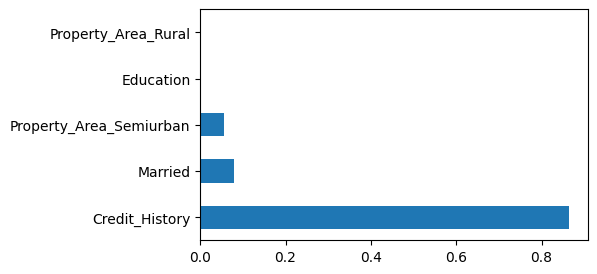

In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Creating the model on training data
DT = tree.fit(x_train, y_train)

# Getting the prediction on testing data
predict = DT.predict(x_test)

# Calculating the accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

# Calculating the f1 score on testing data
f1Score = metrics.f1_score(y_test, predict, average='weighted')
print('The overall accuracy of the model is:', round(f1Score,2))
print('-'*100)

# Plotting the feature importance
featureImportance = pd.Series(DT.feature_importances_, index=predictors)
featureImportance.nlargest(5).plot(kind='barh', figsize=(5,3))

# Applying k fold cross validation to get the average overall accuracy of the model
from sklearn.model_selection import cross_val_score
crossVal = cross_val_score(DT, x, y, cv=7, scoring='f1_weighted')
print(crossVal)
print('The final average accuracy of the model is:', round(crossVal.mean(),2))

# Plotting the Decision Tree

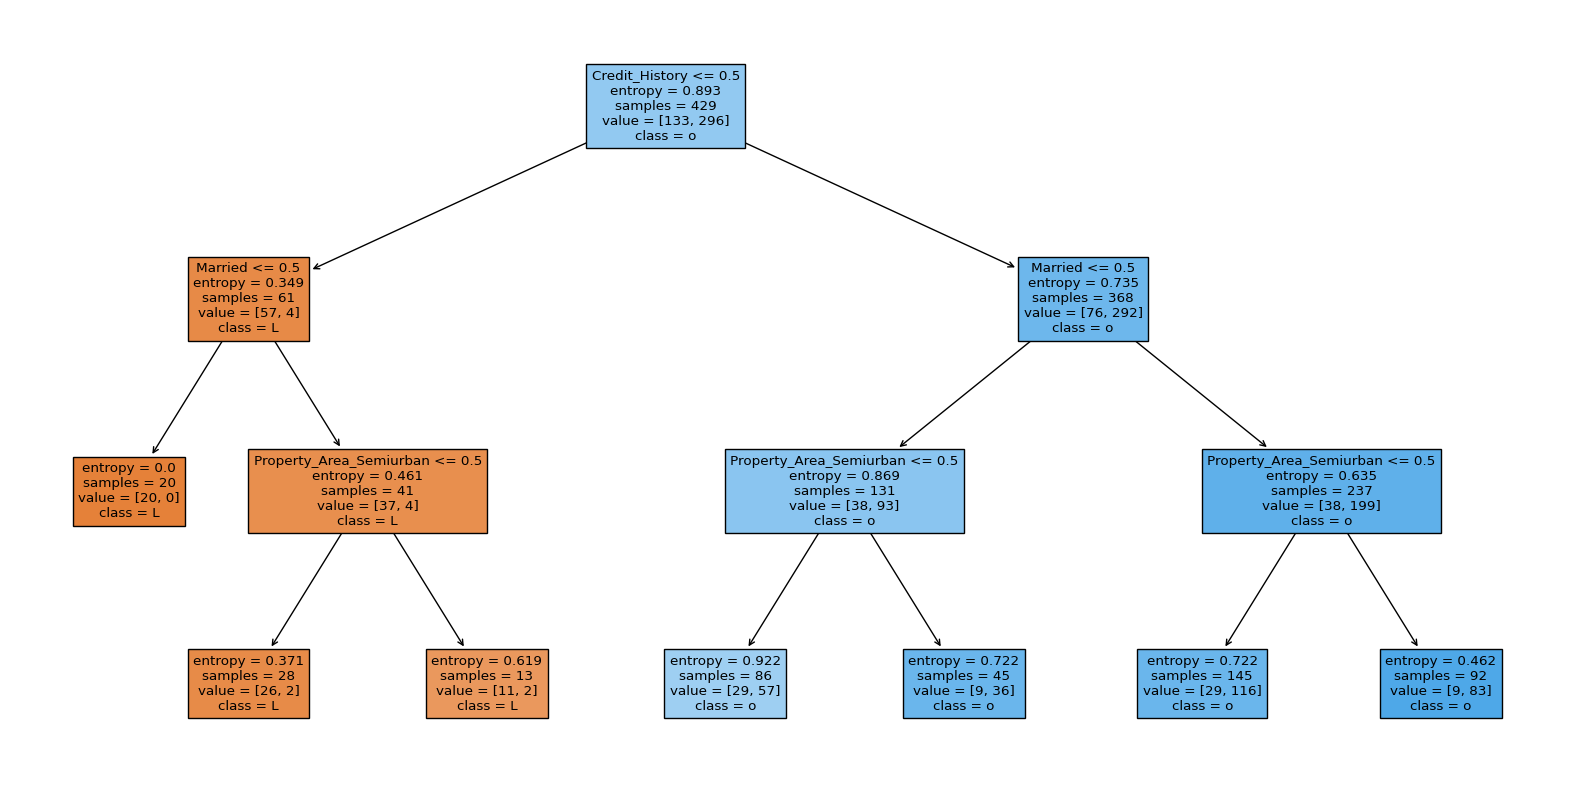

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=predictors, class_names=targetVar, filled=True)
plt.savefig('DTLoanApproval.png', dpi=300)
plt.show()